Based on:
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.use_jedi = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import seaborn as sns
sns.set()

### First: Python tools for dates and times

# Resampling, Shifting, and Windowing

`conda install pandas-datareader`

In [2]:
from pandas_datareader import data as reader

aapl = reader.DataReader('AAPL', start='2015', end=None,
                       data_source='yahoo')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.819241
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.120045
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.122320
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.460564
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.400398


In [3]:

aapl = aapl['Close']


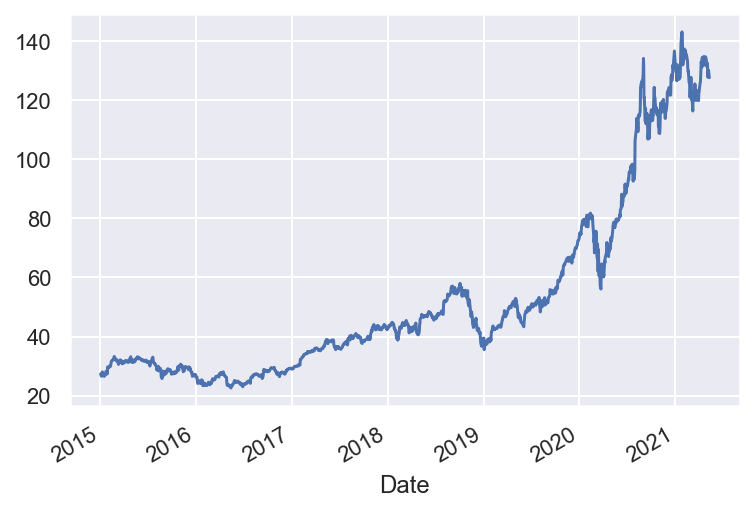

In [4]:
aapl.plot();


### Resampling / converting frequencies

`resample()` is fundamentally a data aggregation, while `asfreq()` is fundamentally a data selection.

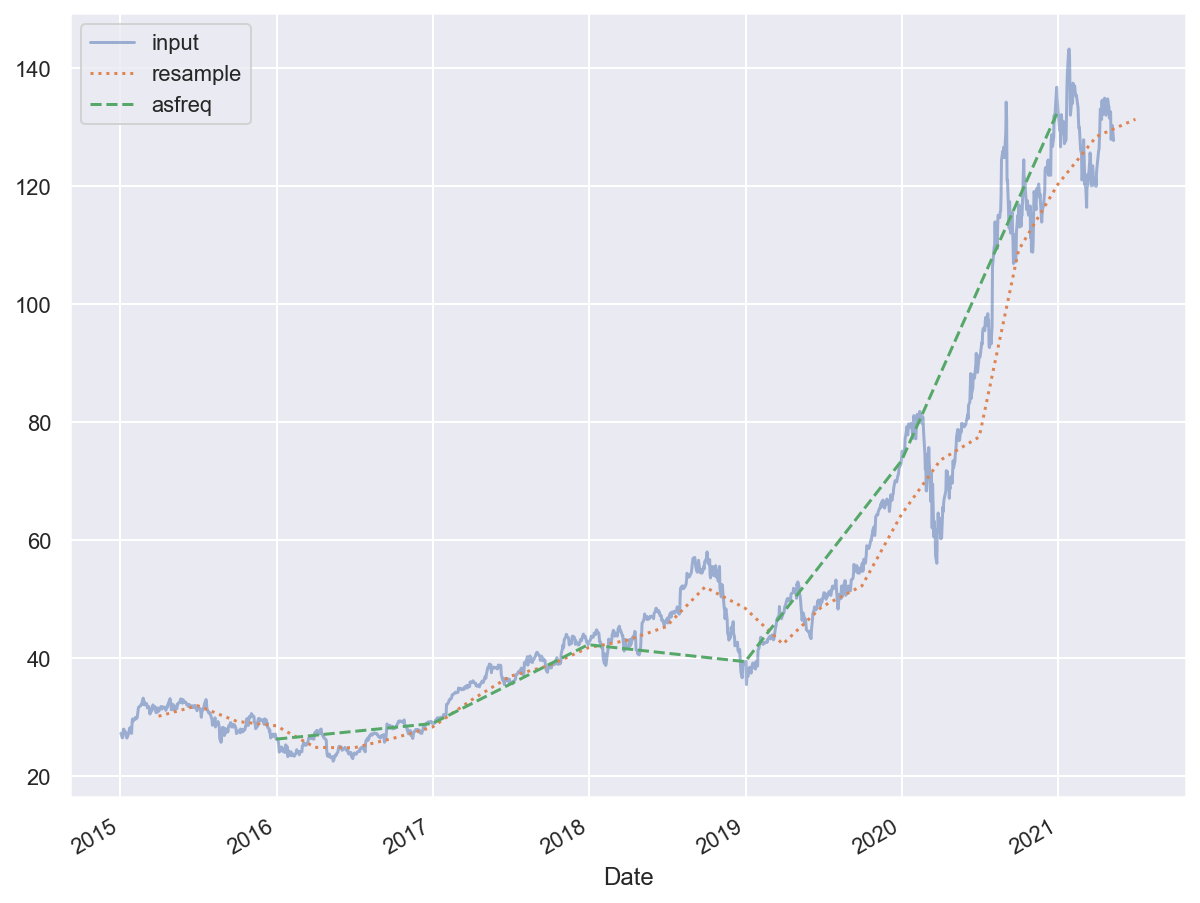

In [5]:
plt.figure(figsize=(10,8))
aapl.plot(alpha=0.5, style='-')
aapl.resample('BQ').mean().plot(style=':')
aapl.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

> Notice the difference: at each point, `resample` reports the average of the previous year, while `asfreq` reports the value at the end of the year.

# `resample` is more flexible:

<AxesSubplot:xlabel='Date'>

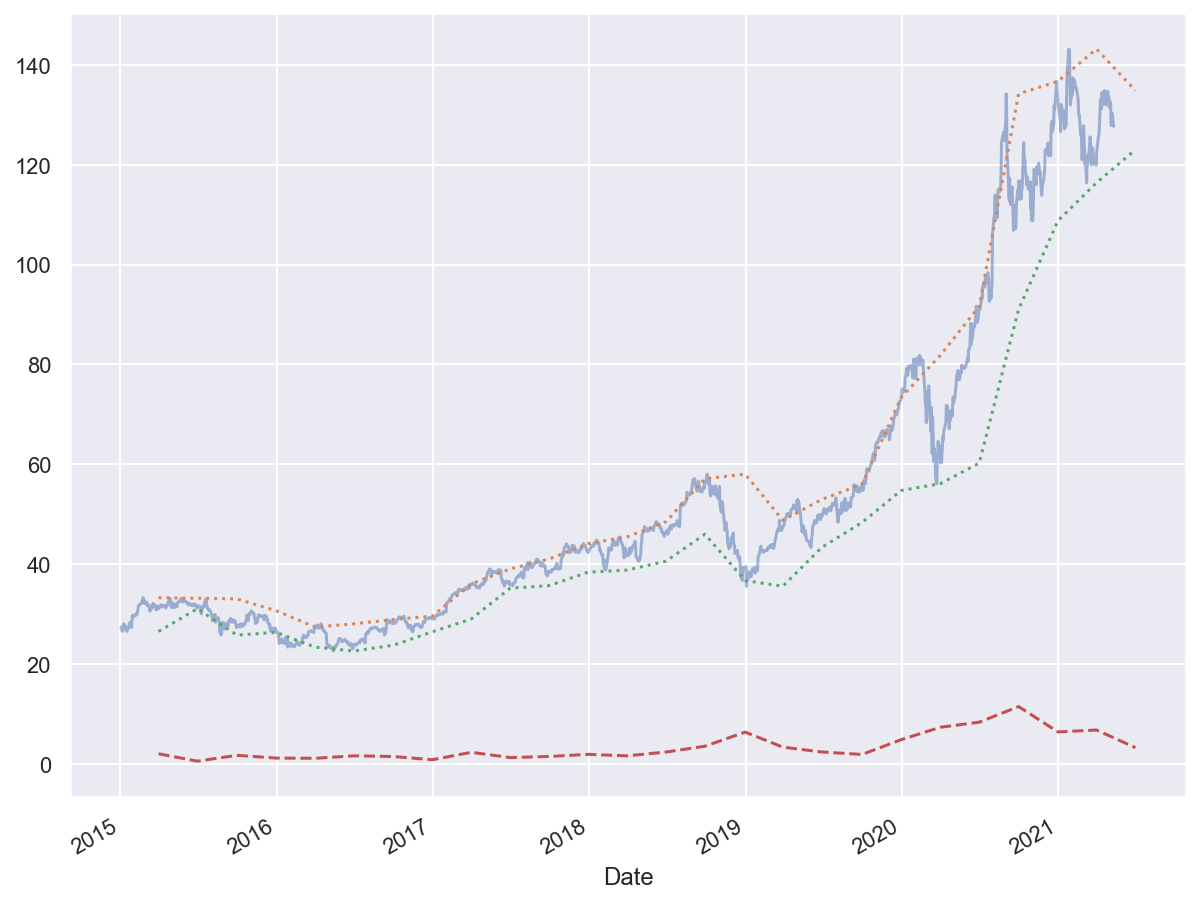

In [6]:
plt.figure(figsize=(10,8))
aapl.plot(alpha=0.5, style='-')
aapl.resample('BQ').max().plot(style=':')
aapl.resample('BQ').min().plot(style=':')
aapl.resample('BQ').std().plot(style='--')





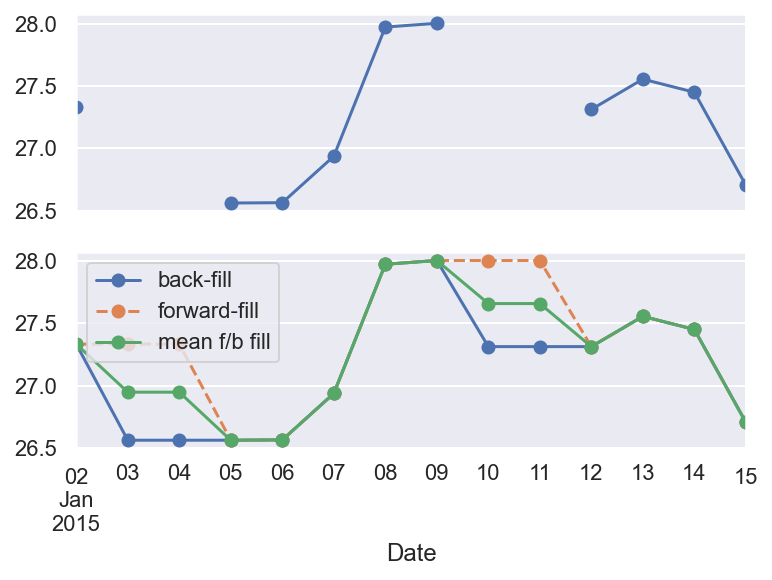

In [7]:
fig, ax = plt.subplots(2, sharex=True)
data = aapl.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')


(data.asfreq('D', method='bfill')/2 + data.asfreq('D', method='ffill')/2).plot(ax=ax[1], style='-o')
ax[1].legend(["back-fill", "forward-fill", 'mean f/b fill']);

### Time shifts

/Users/koppelman/opt/anaconda3/envs/gold/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


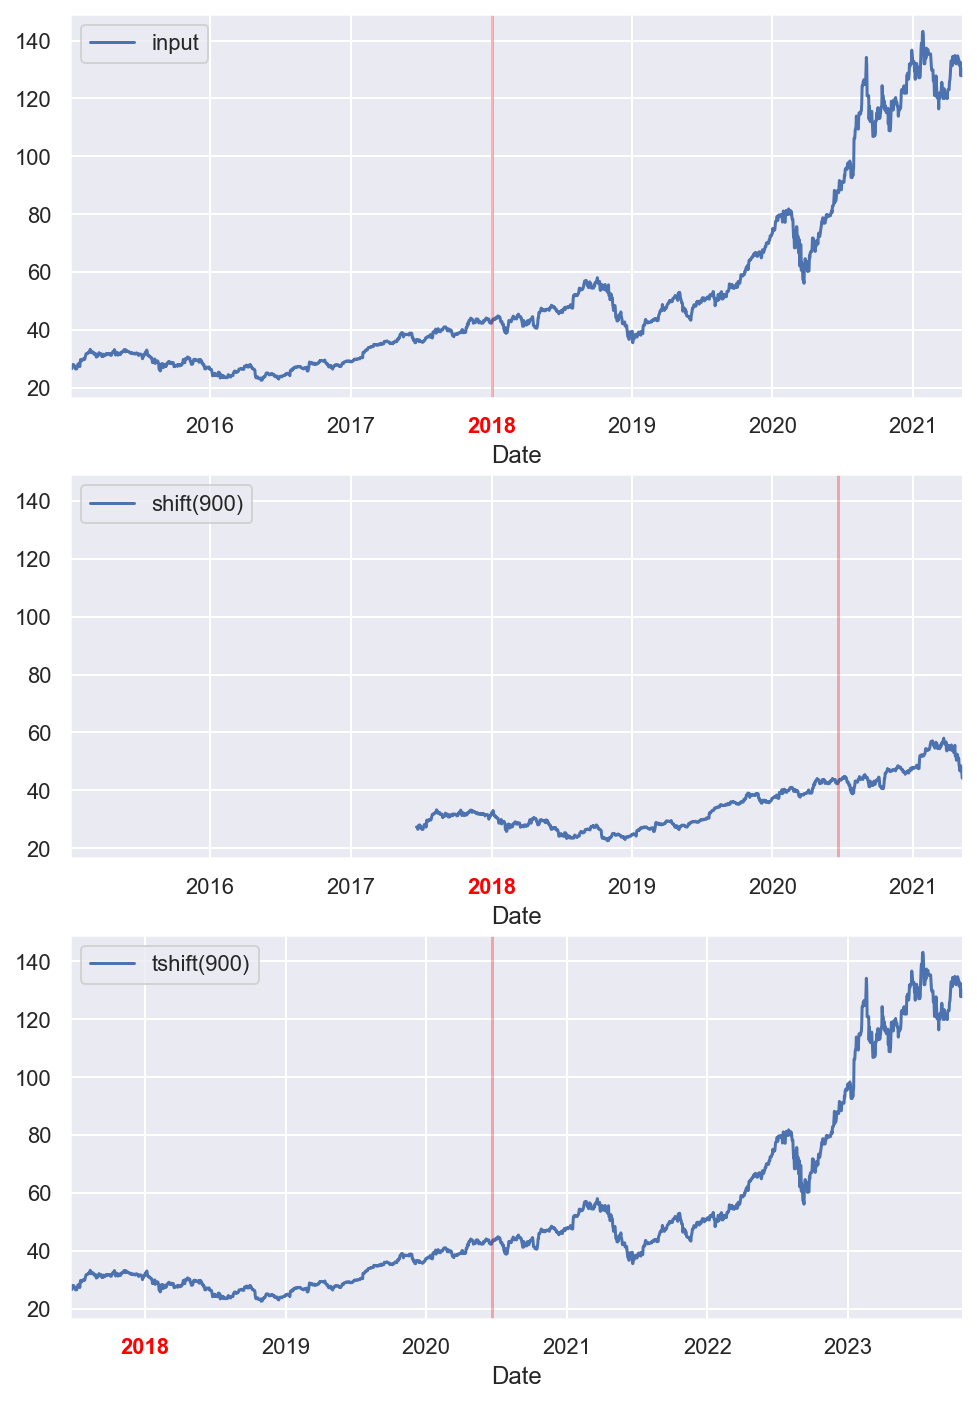

In [8]:
fig, ax = plt.subplots(3, sharey=True, figsize=(8,12))

# apply a frequency to the data
aapl = aapl.asfreq('D', method='pad')

aapl.plot(ax=ax[0])
aapl.shift(900).plot(ax=ax[1])
aapl.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2018-01-01')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[3].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[3].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

/Users/koppelman/opt/anaconda3/envs/gold/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


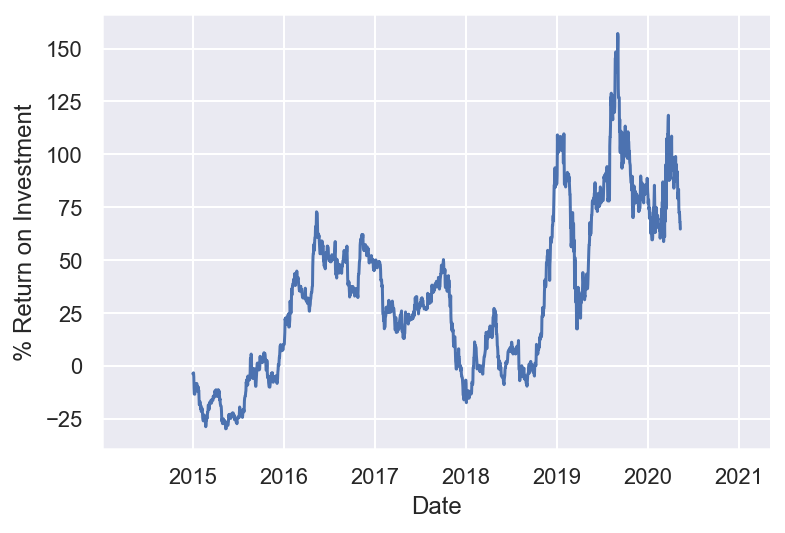

In [9]:
ROI = 100 * (aapl.tshift(-365) / aapl - 1)
ROI.plot()
plt.ylabel('% Return on Investment');
# Is this really the ROI though?
# Fine, the one-year ROI for investing in Apple stock.

## Rolling windows

In [37]:
rolling = aapl.rolling(365, center=True)

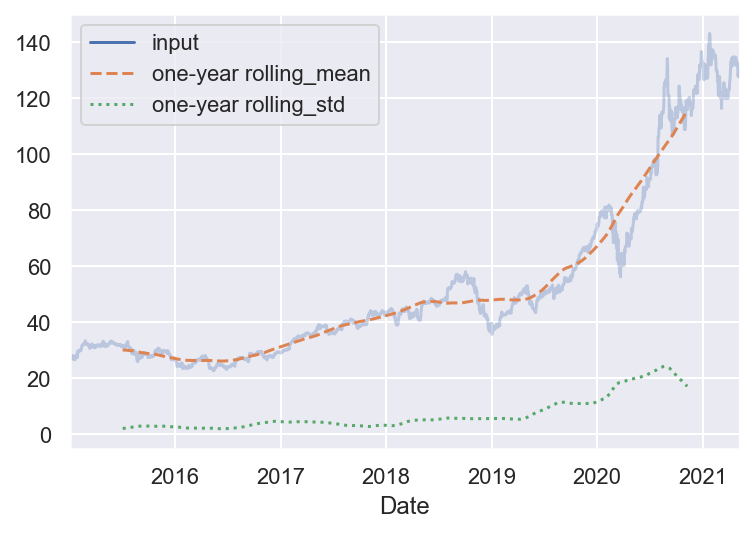

In [38]:
data = pd.DataFrame({'input': aapl,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

> As with group-by operations, the `aggregate()` and `apply()` methods can be used for custom rolling computations.

# Some additional exploration

### Correlation between GOOG and AAPL

In [26]:
goog = reader.DataReader('GOOG', start='2015', end=None,
                       data_source='yahoo')
goog = goog['Close']

In [27]:
aapl.corr(goog)

0.9299673114532967

In [28]:
aapln = aapl.div(aapl[0])
googn = goog.div(goog[0])

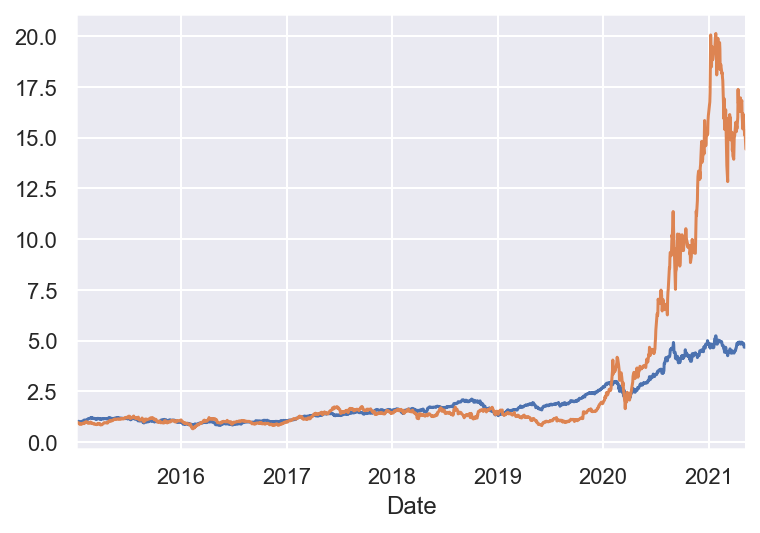

In [25]:
aapln.plot();
googn.plot();

ROI for Tesla

In [35]:
tsla = reader.DataReader('TSLA', start='2015', end=None,
                       data_source='yahoo')
tsla = tsla['Close']


tsla = (tsla.asfreq('D', method='bfill')/2 + tsla.asfreq('D', method='ffill')/2)



/Users/koppelman/opt/anaconda3/envs/gold/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


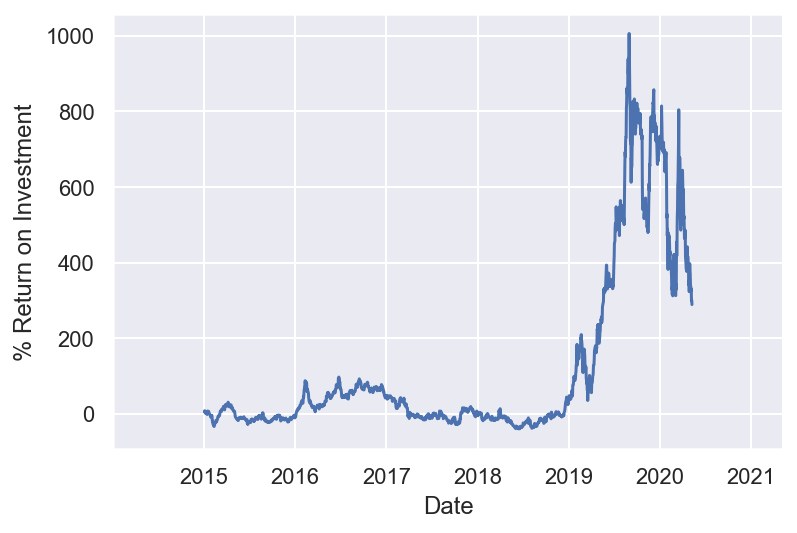

In [36]:
ROI = 100 * (tsla.tshift(-365) / tsla - 1)
ROI.plot()
plt.ylabel('% Return on Investment');
# Is this really the ROI though?
# Fine, the one-year ROI for investing in Apple stock.